<img src = "https://drive.google.com/uc?export=view&id=1sxzZUMO3YZmqYi0xR6vSxG9hZZYrLJIQ" alt = "Encabezado MLDS" width = "100%">  </img>

# **Proyecto (Fase 2):** Reconocimiento vocal de ceatáceos
## **Giovanny Alejandro Cuervo Londoño**

# **Entendimiento y Preparación de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

In [ ]:
# Instalamos los paquetes necesarios
!pip install kaggle
!pip install noisereduce
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 474 µs (started: 2023-05-03 01:38:26 +00:00)


In [ ]:
# Cargamos nuestras credenciales de kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaclondono","key":"4cde53e3afd54e2caaea3b92b292c4ff"}'}

In [ ]:
# Colocamos nuestras credenciales en directorio
# Damos permisos de lecutra y escritura
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargamos el conjunto de datos
!kaggle datasets download -d shreyj1729/best-of-watkins-marine-mammal-sound-database

100% 6.67G/6.68G [00:55<00:00, 123MB/s]
100% 6.68G/6.68G [00:55<00:00, 129MB/s]


In [ ]:
# Conectamos con nuestro google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Almacenamos los datos comprimidos en nuestra carpeta personal
!cp /content/best-of-watkins-marine-mammal-sound-database.zip "/content/drive/MyDrive/Python/Deep learning/Proyecto"

In [ ]:
# Cargamos nuestro datos a colab descomprimidos
!unzip "/content/drive/MyDrive/Python/Deep learning/Proyecto/best-of-watkins-marine-mammal-sound-database.zip" -d ./content/

Streaming output truncated to the last 5000 lines.
  inflating: ./content/data/PantropicalSpottedDolphin/9400805V.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/9400805W.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/9400805X.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/9400805Y.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/9400805Z.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/94008060.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/94008061.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/94008062.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/94008063.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/94008064.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/94008065.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/94008066.wav  
  inflating: ./content/data/PantropicalSpottedDolphin/94008067.wav  
  inflating: ./content/data/PantropicalSpottedDolphi

## **1. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el dataset?
- ¿En qué formato están guartdados los datos?
- ¿Qué tamaño en MB tiene el conjunto?

---**INGRESE SU RESPUESTA**---

In [ ]:
# Importamos los modulos necesarios
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import IPython.display as ipd
import noisereduce as nr
import multiprocessing
# Modulos extra
from numpy.random import randint
from multiprocessing import Pool

time: 1.09 ms (started: 2023-05-03 01:38:26 +00:00)


In [ ]:
# Definimos el directorio base
datadir = './content/data/'
# Lista con las rutas de cada archivo
file_paths = []
# Iterar sobre los subdirectorios y archivos en dri base
for subdir, dirs, files in os.walk(datadir):
    for file in files:
        # Obtener la ruta completa del archivo
        file_path = os.path.join(subdir, file)
        # Agregar la ruta completa del archivo a la lista file_paths
        file_paths.append(file_path)

time: 42.1 ms (started: 2023-05-01 19:11:49 +00:00)


In [ ]:
def get_audio_time(path):
    """
    Durarcion en minutos de la senal de audio
    """
    y, sr = librosa.load(path)
    length = librosa.get_duration(y = y, sr = sr)
    return length / 60.0

time: 844 µs (started: 2023-05-01 22:45:29 +00:00)


In [ ]:
# Diccionario con keys como columnas y values como datos para definir un df
data = {'class': [os.path.basename(os.path.dirname(fp)) for fp in file_paths],
        'file_name': [os.path.basename(fp) for fp in file_paths],
        'path': [fp for fp in file_paths],
        'length_min' : [get_audio_time(fp) for fp in file_paths],
        'size_MB' : [os.path.getsize(fp) / 1024 ** 2 for fp in file_paths]}
# Dataframe a partir del diccionario datos
df = pd.DataFrame(data)
df

,class,file_name,path,length_min,size_MB
0,Narwhal,7501400L.wav,./content/data/Narwhal/7501400L.wav,0.023633,0.221601
1,Narwhal,68003007.wav,./content/data/Narwhal/68003007.wav,0.029922,0.140303
2,Narwhal,7501400U.wav,./content/data/Narwhal/7501400U.wav,0.023633,0.221601
3,Narwhal,7501400E.wav,./content/data/Narwhal/7501400E.wav,0.023633,0.221601
4,Narwhal,6800200A.wav,./content/data/Narwhal/6800200A.wav,0.023633,0.221601
...,...,...,...,...,...
15562,WestIndianManatee,64036001.wav,./content/data/WestIndianManatee/64036001.wav,0.017500,0.041059
15563,WestIndianManatee,64013003.wav,./content/data/WestIndianManatee/64013003.wav,0.009130,0.020941
15564,WestIndianManatee,64036006.wav,./content/data/WestIndianManatee/64036006.wav,0.014376,0.033735
15565,WestIndianManatee,64009009.wav,./content/data/WestIndianManatee/64009009.wav,0.054392,0.377258


time: 3min 12s (started: 2023-05-01 22:45:58 +00:00)


In [ ]:
# Informacion general del conjunto de datos
n_files = df.shape[0]
formato = df['file_name'].str[-3:].unique().tolist()
data_size = sum(df.loc[:, 'size_MB'])
print(f'Numero de archivos: {n_files}')
print(f"Duracion promedio: {np.mean(df['length_min']):0.2f} min")
print(f'Formato de los archivos: {formato}')
print(f'Tamano del conjunto de datos: {data_size:0.2f} MB')

Numero de archivos: 15567
Duracion promedio: 0.12 min
Formato de los archivos: ['wav']
Tamano del conjunto de datos: 10615.15 MB
time: 29.8 ms (started: 2023-05-01 22:51:28 +00:00)


> A partir del anterior `dataframe` podemos responder las siguientes preguntas:
* **¿Cuántos documentos tiene el dataset?**
  - El documento tiene un total de $15567$ de audio con una duración promedio de $0.12$ min.
* **¿En qué formato están guartdados los datos?**
  - Todos los audios están en formato `wav`.
* **¿Qué tamaño en MB tiene el conjunto**
  - El conjunto de datos tiene un tamaño de `10615.15 MB` (10 GB).


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length_min,15567.0,0.115892,0.670996,0.000279,0.018956,0.031051,0.049666,24.265528
size_MB,15567.0,0.681901,4.877411,0.000782,0.063011,0.153471,0.354168,213.221478


time: 93.1 ms (started: 2023-05-01 22:53:41 +00:00)


### **1.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?
- ¿Existen documentos ilegibles o con problemas de codificación?
- ¿Hay mezcla de formatos en el conjunto?

---**INGRESE SU RESPUESTA**---

> **¿Hay datos faltantes, documentos vacíos o de mala calidad?**
* Para determinar la calidad de los audios es importante determinar la cantidad de ruida de la señal, es decir, podemos sumir que un audio con gran cantidad de ruido será de baja calidad.
Una métrica comveniente es la relación entre el ruido y la señal o en ingles *signal-to-noise ratio* (**SNR**). Esta métrica, expresada en decibelios, mide la relación entre la energía de la señal y la energía del ruido en el audio en una escala logarítmica.
$$SNR (dB) = 10 \cdot log10(S_{Power} / N_{Power})$$
De manera que un SNR negativo ($SNR<0$) indica un audio de baja calidad mientras que si el valor de la métrica es positivo ($SNR>0$) indicara una mayor calidad del audio.

In [ ]:
def denoised_preprocess(y, sr):
    """
    Remueve el ruido de una senal
    retornando la senal original, senal sin ruido y el ruido.
    """
    # Remueve el ruido de la senal
    denoised_y = nr.reduce_noise(y = y, sr = sr,
                               n_std_thresh_stationary=1.8, # 1.5,
                               stationary=True # True
                               )
    # Hallar el ruido
    noise = y - denoised_y
    return y, denoised_y, noise

time: 966 µs (started: 2023-05-01 23:35:35 +00:00)


In [ ]:
def SNR(S, N):
    """
    Calcula el signal to noise ratio en dB
    """
    # Transforma amplitud a decibelios
    S_DB = librosa.amplitude_to_db(S)
    N_DB = librosa.amplitude_to_db(N)
    # Calcula la energia de la senal
    S_energy = librosa.db_to_power(S_DB)
    N_energy = librosa.db_to_power(N_DB)
    # Energia promedio
    S_power = np.mean(S_energy)
    N_power = np.mean(N_energy)
    # Calcula SNR en dB
    SNR = 10 * np.log10(S_power / N_power)
    return SNR

time: 950 µs (started: 2023-05-01 23:35:36 +00:00)


In [ ]:
# Indice aleatorio
n = randint(0, df.shape[0])
# Elige un audio aleatorio
rand_file = df['path'][n]
# Rotorna el nombre de la clase y nombre del audio
clase, archivo = os.path.basename(os.path.dirname(rand_file)), os.path.basename(rand_file)
# Carga el audio
y, sr = librosa.load(rand_file)

time: 14.3 ms (started: 2023-05-01 23:35:37 +00:00)


In [ ]:
# Calcula la senal sin ruido
y, denoised_y, noise = denoised_preprocess(y, sr)

In [ ]:
# Audio original
print(f"Original sigal : {clase} - {archivo}")
ipd.Audio(y, rate=sr)

Original sigal : KillerWhale - 9750401R.wav


In [ ]:
# Audio sin ruido
print(f"Denoised sigal : {clase} - {archivo}")
ipd.Audio(denoised_y, rate=sr)

Denoised sigal : KillerWhale - 9750401R.wav


In [ ]:
# Ruido
print(f"Noise : {clase} - {archivo}")
ipd.Audio(noise, rate=sr)

Noise : KillerWhale - 9750401R.wav


In [ ]:
# Calcula SNR del audio elegido
print(f'{clase} - {archivo} \nSNR = {SNR(y, noise)}')

KillerWhale - 9750401R.wav 
SNR = 0.32406605780124664


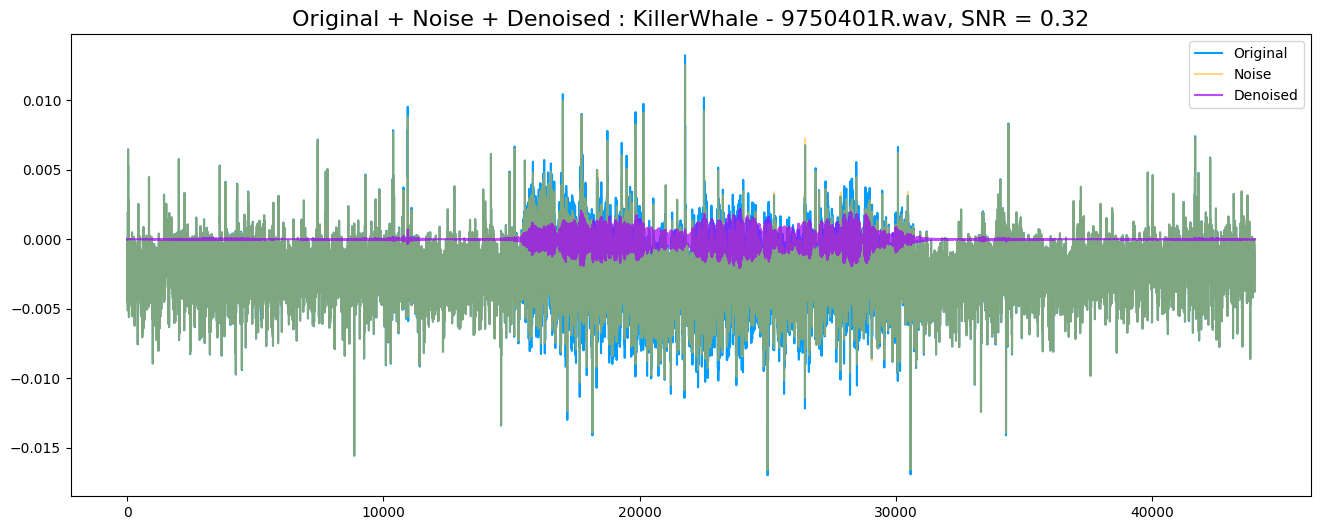

In [ ]:
# Compara las tre senales: Original, Ruido y Sin ruido
plt.figure(figsize = (16, 6))
plt.plot(y, color = '#009DFF', label='Original')
plt.plot(noise, color = '#FFB100', alpha=0.5, label='Noise')
plt.plot(denoised_y, color = '#A300F9', alpha=0.7, label='Denoised')
plt.title(f"Original + Noise + Denoised : {clase} - {archivo}, SNR = {SNR(y, noise):0.2f}", fontsize=16)
plt.legend()

In [ ]:
# Pipeline para calcular SNR
def pipe_SNR(f_path):
    """
    Pipeline para optener el SNR de cada audio
    """
    y, sr = librosa.load(f_path)
    y, denoised_y, noise = denoised_preprocess(y, sr)
    return SNR(y, noise)

time: 703 µs (started: 2023-05-01 23:35:44 +00:00)


In [ ]:
# Paralelizacion del pipeline
n_cpus = multiprocessing.cpu_count()
print("Number of available CPUs:", n_cpus)
def parallel_pipe_SNR(paths, num_processes=n_cpus):
    with Pool(num_processes) as pool:
        SNR = pool.map(pipe_SNR, paths)
        pool.close()
    return SNR

Number of available CPUs: 2
time: 3.84 ms (started: 2023-05-01 23:35:45 +00:00)


In [ ]:
# Calula el SNR para cada senal del dataset
df['SNR'] = parallel_pipe_SNR(df['path'].tolist())

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=879
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=585
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=731
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=595
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=549
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=517
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: 

time: 31min 56s (started: 2023-05-01 23:35:47 +00:00)


In [ ]:
df

,class,file_name,path,length_min,size_MB,SNR
0,Narwhal,7501400L.wav,./content/data/Narwhal/7501400L.wav,0.023633,0.221601,0.041813
1,Narwhal,68003007.wav,./content/data/Narwhal/68003007.wav,0.029922,0.140303,0.118808
2,Narwhal,7501400U.wav,./content/data/Narwhal/7501400U.wav,0.023633,0.221601,1.334958
3,Narwhal,7501400E.wav,./content/data/Narwhal/7501400E.wav,0.023633,0.221601,0.305832
4,Narwhal,6800200A.wav,./content/data/Narwhal/6800200A.wav,0.023633,0.221601,0.067411
...,...,...,...,...,...,...
15562,WestIndianManatee,64036001.wav,./content/data/WestIndianManatee/64036001.wav,0.017500,0.041059,0.456720
15563,WestIndianManatee,64013003.wav,./content/data/WestIndianManatee/64013003.wav,0.009130,0.020941,0.208792
15564,WestIndianManatee,64036006.wav,./content/data/WestIndianManatee/64036006.wav,0.014376,0.033735,3.720786
15565,WestIndianManatee,64009009.wav,./content/data/WestIndianManatee/64009009.wav,0.054392,0.377258,1.343921


time: 30.7 ms (started: 2023-05-02 00:07:44 +00:00)


In [ ]:
# Guardamos el df en nuestra ruta
df.to_csv("/content/drive/MyDrive/Python/Deep learning/Proyecto/df_audios.csv")

time: 280 ms (started: 2023-05-02 00:07:44 +00:00)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Python/Deep learning/Proyecto/df_audios.csv").iloc[:, 1:]

time: 49.8 ms (started: 2023-05-03 01:38:29 +00:00)


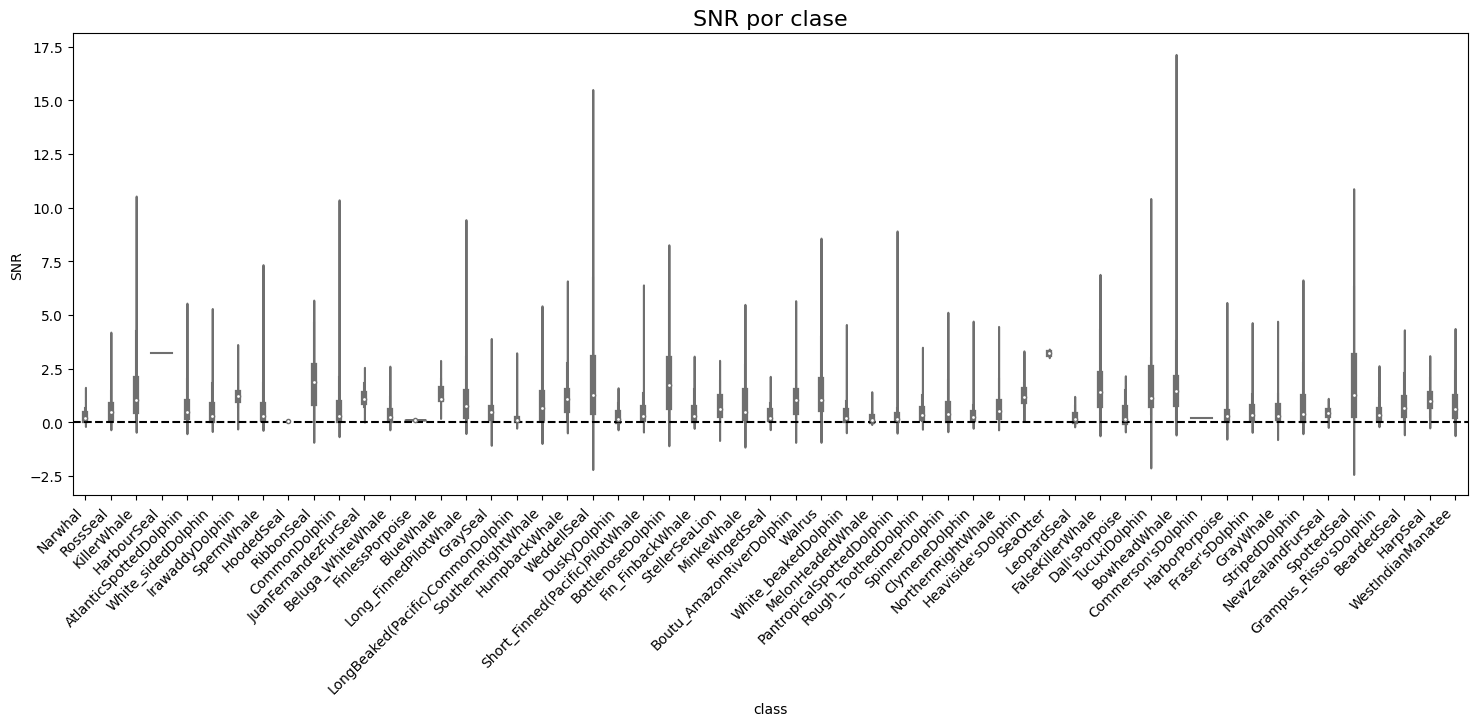

time: 7.16 s (started: 2023-05-02 00:40:39 +00:00)


In [ ]:
# Compara con boxplot el valor SNR de cada clase del dataset
fig, ax = plt.subplots(figsize=(18, 6))
sns.violinplot(data=df, x="class", y="SNR", ax=ax, palette="pastel")
plt.axhline(0, color='black', linestyle='dashed')
plt.title(f"SNR por clase", fontsize=16)
plt.xticks(rotation=45, ha="right");

In [ ]:
# Calcula el SNR promedio de todo el dataset
SNR_mean = np.mean(df['SNR'])
print(f'SNR promedio: {SNR_mean:0.2f} dB')

SNR promedio: 0.93 dB
time: 1.53 ms (started: 2023-05-01 21:41:49 +00:00)


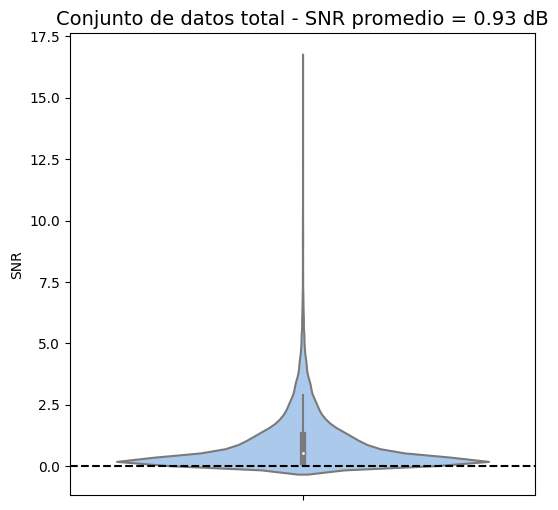

time: 485 ms (started: 2023-05-02 00:40:24 +00:00)


In [ ]:
# Grafica boxplot del SNR de todo el dataset
fig, ax = plt.subplots(figsize=(6, 6))
sns.violinplot(data=df, y="SNR", ax=ax, palette="pastel")
plt.axhline(0, color='black', linestyle='dashed')
plt.title(f"Conjunto de datos total - SNR promedio = {SNR_mean:0.2f} dB", fontsize=14)
plt.xticks(rotation=45, ha="right");

> Calculando el SNR de cada uno de los audios es posible cuantificar la calidad de cada una de las señales de audio. En general, la mayoría de los audios son de alta calidad ($SNR > 0$) dado que el dataset tiene un SNR promerdio de $0.93$ dB. Sin embargo, al comparar la distrbución de los valores de SNR para cada uno de las clases se puede observar que hay clases con una calidad de audio más baja que otras. En general, las clases con menor calidad de audio son tres:
- Weddell Seal
- Tucuxi Dolphin
- Spotted Seal

> **¿Existen documentos ilegibles o con problemas de codificación?**
* El para calcular el SNR fue necesario cargar y procesar cada una de las señales de audio del dataset por lo que es posible asumir que todos los audios son legibles.

> **¿Hay mezcla de formatos en el conjunto?**
* No, todos los audios tienen el mismo formato (**wav**).

### **1.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.
- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

---**INGRESE SU RESPUESTA**---

> **¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?**
* La variable a estimar es una clase es decir es de tipo categórica, en este caso, se pretende determinar el tipo de mamífero marino a partir de du vocalización característica.


In [ ]:
print(f"Numero de clases: {len(df['class'].unique())}")
print(f"Tipo de dato: {df['class'].dtypes}")
print(f"Clases: {df['class'].unique().tolist()}")

Numero de clases: 55
Tipo de dato: object
Clases: ['Narwhal', 'RossSeal', 'KillerWhale', 'HarbourSeal', 'AtlanticSpottedDolphin', 'White_sidedDolphin', 'IrawaddyDolphin', 'SpermWhale', 'HoodedSeal', 'RibbonSeal', 'CommonDolphin', 'JuanFernandezFurSeal', 'Beluga_WhiteWhale', 'FinlessPorpoise', 'BlueWhale', 'Long_FinnedPilotWhale', 'GraySeal', 'LongBeaked(Pacific)CommonDolphin', 'SouthernRightWhale', 'HumpbackWhale', 'WeddellSeal', 'DuskyDolphin', 'Short_Finned(Pacific)PilotWhale', 'BottlenoseDolphin', 'Fin_FinbackWhale', 'StellerSeaLion', 'MinkeWhale', 'RingedSeal', 'Boutu_AmazonRiverDolphin', 'Walrus', 'White_beakedDolphin', 'MelonHeadedWhale', 'PantropicalSpottedDolphin', 'Rough_ToothedDolphin', 'SpinnerDolphin', 'ClymeneDolphin', 'NorthernRightWhale', "Heaviside'sDolphin", 'SeaOtter', 'LeopardSeal', 'FalseKillerWhale', "Dall'sPorpoise", 'TucuxiDolphin', 'BowheadWhale', "Commerson'sDolphin", 'HarborPorpoise', "Fraser'sDolphin", 'GrayWhale', 'StripedDolphin', 'NewZealandFurSeal', 'Spot

> **Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.**
* A paretir de un diagrama de barras es posible determinar si si las clases están balanceadas o no.


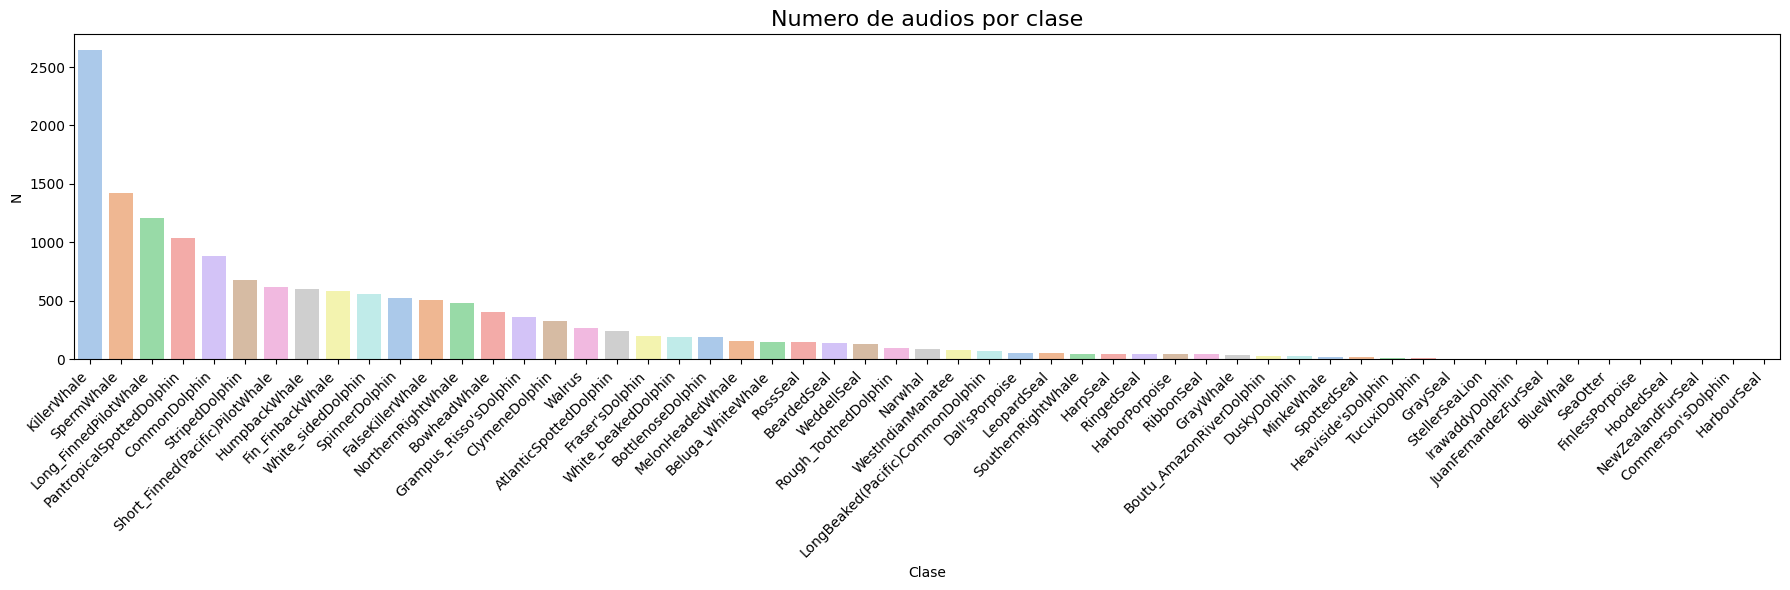

time: 1.46 s (started: 2023-05-01 23:34:43 +00:00)


In [ ]:
fig = plt.figure(figsize=(18, 6))
sorted_class_ascend = df['class'].value_counts()
fig = sns.barplot(x=sorted_class_ascend.index, y=sorted_class_ascend.values, palette="pastel")
plt.xticks(rotation=45, ha="right")
plt.title(f"Numero de audios por clase", fontsize=16);
plt.ylabel('N')
plt.xlabel('Clase')
plt.tight_layout()

> A partir del diagrama de barras se puede establecer que el conjunto de datos está desbalanceado. La mayoría de audios corresponden a **killer Whale**, **Sperm Whale** y **Long Finned Pilot Whale**.

> **¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.**
* Es posible derivar nuevas varaibles a partir del análisis del mismo, algunas variables como: duración del audio (`length_min`), tamaño del audio (`size_MB`) y *Signal-to-noise ratio* (`SNR`); pueden derivarse del conjunto de datos. Sin embargo, ninguna de estas varaibles tienen relación con la naturaleza del audio, por lo que no tienen caracter explicativo, es decir ninguna de estas son particculares de la naturaleza del sonido ni esta realcionado con su categoría. Por tanto, si se quieren incorporar nuevas varaibles al modelo estas deben reflejar la naturaleza de la señal y ser únicas de cada una de las clases que se pretenden calsificar.

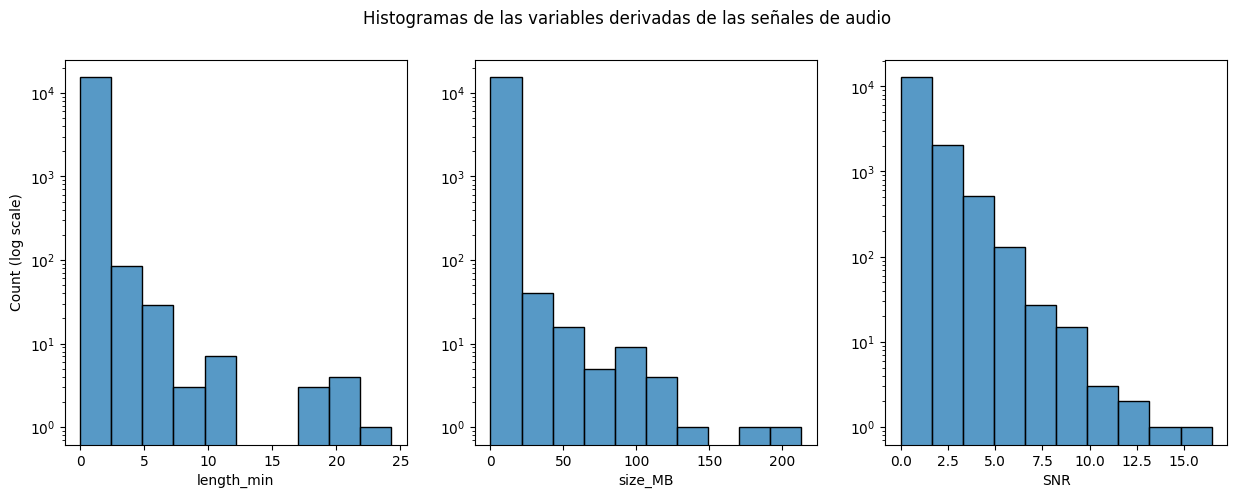

time: 3.49 s (started: 2023-05-02 21:43:38 +00:00)


In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Plot histogram for each variable in its respective subplot
sns.histplot(df['length_min'], ax=axs[0], kde=False, bins=10)
sns.histplot(df['size_MB'], ax=axs[1], kde=False, bins=10)
sns.histplot(df['SNR'], ax=axs[2], kde=False, bins=10)

# Set y-axis scale to log
for ax in axs:
    ax.set_yscale('log')

# Set labels for each subplot
axs[0].set(xlabel='length_min', ylabel='Count (log scale)')
axs[1].set(xlabel='size_MB', ylabel='')
axs[2].set(xlabel='SNR', ylabel='')

# Add title to the figure
fig.suptitle('Histogramas de las variables derivadas de las señales de audio');

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length_min,15567.0,0.115892,0.670996,0.000279,0.018956,0.031051,0.049666,24.265528
size_MB,15567.0,0.681901,4.877411,0.000782,0.063011,0.153471,0.354168,213.221478
SNR,15567.0,0.927730,1.113579,0.000000,0.184495,0.517951,1.269397,16.453775


time: 82.3 ms (started: 2023-05-02 05:50:05 +00:00)


> Al realizar un análisis descriptivo de las variables cuantitativas derivadas de los audios es posibles observar que la mayoría de audios tiene una duración menor a los 5 min, esto tiene relación con el peso en MB de los mismos, dado que la mayoría no superan los 60 MB. En cuanto a el SNR, se puede observar que la mayoría presentan valores positivos de SNR, lo que indica una buena relación señal/ruido.

### **1.4. Relación Entre Variables**
---

- Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.
- Identifique si hay redundancia entre las variables para una posterior eliminación o selección.

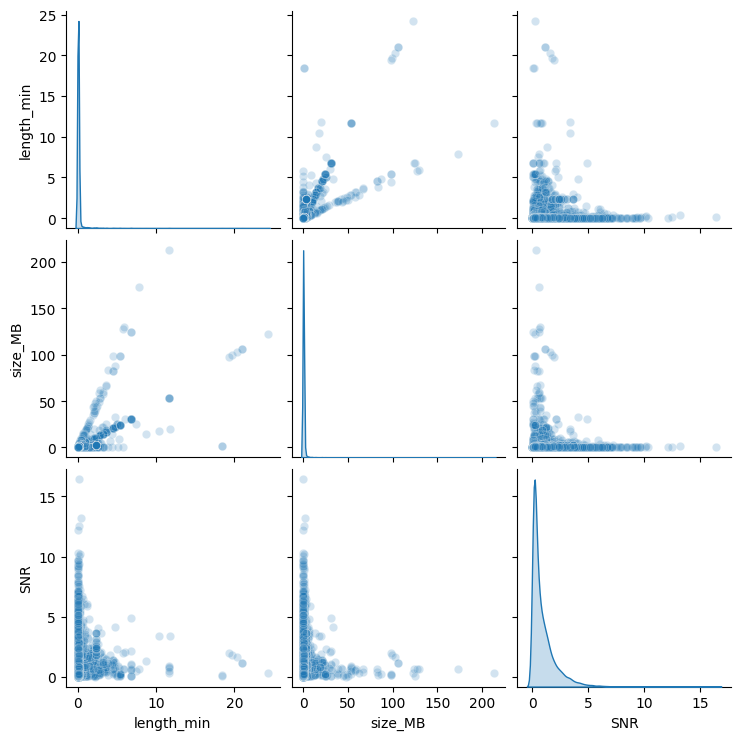

time: 6.82 s (started: 2023-05-02 21:17:23 +00:00)


In [ ]:
sns.pairplot(df, diag_kind= 'kde', plot_kws={'alpha': 0.2});

---**INGRESE SU RESPUESTA**---

>**Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.**

- Es posible observar una relación entre las variables de duración del audio y su peso en MB. Sin embargo, esto no aporta gran información dado que un audio de mayor duración tendrá un mayor peso en MB.

>**Identifique si hay redundancia entre las variables para una posterior eliminación o selección.**
- Es posible determinar redundancia en las varaibles de duración y peso de los audios dado que ambas están aportando la misma información.

## **2. Limpieza de los Datos**
---

La selección de las técnicas de preprocesamiento puede variar en cada conjunto de datos. Recuerde que puede aplicar (no necesariamente todas) las técnicas generales vistas en el curso, dependiendo si está trabajando con imagenes, datos estructurados, textos, etc.

> La limpieza de los datos de audio en esta caso consistió en la eliminación de ruido, utilizando la función `nr.reduce_noise`. adicionalmente, se definió un dataset de tensro flow para realizar este procediemiento de limpieza junto con posible preprocesamiento de los datos.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0
time: 1.87 ms (started: 2023-05-03 01:38:33 +00:00)


In [ ]:
# ---INGRESE SU CÓDIGO---

# Definir la función para cargar y preprocesar un único archivo de audio
def preprocess_audio(file_path):
    # Cargar el archivo de audio
    y, sr = librosa.load(file_path.numpy().decode())
    # Varia sr segun el tiempo de duracion
    # Para mantener constante el tamano del vector y=22295 (tamano deseado)
    length = 22295
    duration = len(y)/sr
    sr_r = length/duration
    y = librosa.resample(y, orig_sr=sr, target_sr=sr_r)[:length]
    # Reduccion de ruido
    y = nr.reduce_noise(y = y, sr = sr,
                                 n_std_thresh_stationary=1.8, # 1.5,
                                 stationary=True # True
                                 )
    # Convertir el audio en un tensor TensorFlow
    audio_tensor = tf.convert_to_tensor(y, dtype=tf.float32)
    return audio_tensor

# Definir la función para crear el conjunto de datos
def create_dataset(file_paths, batch_size=32, shuffle=True, num_parallel_calls=None):
    # Extrae las etiquetas
    vdirname = np.vectorize(os.path.dirname)
    labels = np.vectorize(os.path.basename)(vdirname(file_paths))
    # Crear un dataset a partir de las rutas de los archivos
    file_path_dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    # Aplicar la función preprocess_audio a cada ruta de archivo
    audio_dataset = file_path_dataset.map(lambda file_path, label : (tf.py_function(preprocess_audio,
                                                                                    [file_path],
                                                                                    [tf.float32]),
                                                                     label),
                                          num_parallel_calls=num_parallel_calls)
    # Mezclar los datos (si se solicita)
    if shuffle:
        audio_dataset = audio_dataset.shuffle(buffer_size=len(file_paths))
    # Batch
    audio_dataset = audio_dataset.batch(batch_size)
    # Prefetch el dataset
    audio_dataset = audio_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return audio_dataset

time: 5.76 ms (started: 2023-05-03 02:34:59 +00:00)


In [ ]:
dataset = create_dataset(df['path'])

time: 148 ms (started: 2023-05-03 02:35:10 +00:00)


In [ ]:
iter(dataset).next()

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:1781: RuntimeWarning: divide by zero encountered in log10
  log_spec: np.ndarray = 10.0 * np.log10(np.maximum(amin, magnitude))


(<tf.Tensor: shape=(32, 1, 22295), dtype=float32, numpy=
 array([[[ 2.9380398e-04,  2.2372897e-04,  1.4429778e-04, ...,
           4.1175601e-05,  1.4281819e-04, -2.4502800e-05]],
 
        [[ 1.9052904e-04,  1.5750091e-04,  2.1886578e-04, ...,
           3.3037823e-03,  1.8638128e-03, -7.4267184e-04]],
 
        [[-5.1115762e-07, -4.3551391e-03, -4.7801253e-03, ...,
          -3.9363708e-03, -4.2363750e-03, -4.1129766e-03]],
 
        ...,
 
        [[ 9.4416190e-04,  5.0550268e-05,  1.9837750e-04, ...,
          -1.6400942e-03, -6.1289180e-04, -5.8749283e-04]],
 
        [[-3.9086703e-04, -6.9728692e-04,  3.7679609e-05, ...,
           3.5993976e-04,  2.8459242e-04,  2.6315759e-04]],
 
        [[-3.7089006e-21, -2.0565033e-21,  5.9317598e-21, ...,
          -1.0251486e-20, -3.9150067e-21,  1.9551121e-21]]], dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=string, numpy=
 array([b'PantropicalSpottedDolphin', b'RibbonSeal', b'Fin_FinbackWhale',
        b'StripedDolphin', b'LongBeaked(P

time: 12min 56s (started: 2023-05-03 02:35:11 +00:00)


# **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Santiago Toledo Cortés](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/)
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](https://www.linkedin.com/in/mario-andres-rodriguez-triana-394806145/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*